In [21]:
import pandas as pd
import sys
sys.path.append("../..") 

from src.data_loaders.helpers import chamber_to_value
from src.data_loaders.rollcall import get_rollcall_data_crs_policy_areas, get_raw_individual_votes

In [24]:
df = pd.read_csv("../data/house_senate_votes.csv")
print(df.shape, sorted(df["cast_code"].unique()), df.columns)

yeas = [1, 2, 3]
nays = [4, 5, 6]
abstain = [7, 8, 9]

df["vote_for"] =  df["cast_code"].isin(yeas).astype(int)
df["vote_against"] = df["cast_code"].isin(nays).astype(int)
assert ((df["vote_for"] + df["vote_against"]) <= 1).all()

print(df["chamber"].unique())
df["chamber"] = df["chamber"].str.lower().apply(chamber_to_value)
df.to_parquet("../data/house_senate_votes.parquet")

(26122580, 6) [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)] Index(['congress', 'chamber', 'rollnumber', 'icpsr', 'cast_code', 'prob'], dtype='object')
['House' 'Senate']


In [23]:
df.columns

Index(['congress', 'chamber', 'rollnumber', 'icpsr', 'cast_code', 'prob',
       'vote_for', 'vote_against'],
      dtype='object')

In [2]:
ind_df = get_raw_individual_votes()
bill_df = get_rollcall_data_crs_policy_areas()

Cache not found. Running function and saving to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_crs_policy_6.parquet
Cache not found. Running function and saving to /Users/declannelson/Desktop/columbia/stat5241/stat5241_team_7/src/data/rollcall_cleaned_6.parquet


In [3]:
ind_df.head()

vote_for  vote_against
congress chamber rollnumber icpsr                        
1        0       1          154.0         0             1
                            259.0         0             0
                            379.0         1             0
                            649.0         1             0
                            786.0         1             0

In [4]:
bill_df.shape, ind_df.shape

((11324, 42), (26122580, 2))

In [5]:
df = bill_df.join(ind_df, how='left')
df.shape

(2941234, 44)

In [6]:
df.index.duplicated().sum()

np.int64(0)

In [7]:
df.index.unique('icpsr')

Index([  633.0,  1077.0,  1087.0,  2009.0,  2605.0,  3078.0,  5101.0,  6455.0,
        6845.0,  8080.0,
       ...
       21753.0, 21754.0, 21755.0, 41700.0, 41701.0, 41702.0, 41703.0, 41704.0,
       41705.0, 41706.0],
      dtype='float64', name='icpsr', length=1624)

In [8]:
df.head()

vote_passed  \
date       congress session chamber bill_number rollnumber icpsr                 
1990-01-24 101      2.0     0       hr2712      371        633.0             1   
                                                           1077.0            1   
                                                           1087.0            1   
                                                           2009.0            1   
                                                           2605.0            1   

                                                                   vote_type_amend  \
date       congress session chamber bill_number rollnumber icpsr                     
1990-01-24 101      2.0     0       hr2712      371        633.0                 0   
                                                           1077.0                0   
                                                           1087.0                0   
                                                           2009.0                0   
                                                           2605.0                0   

                                                                   vote_type_cloture  \
date       congress session chamber bill_number rollnumber icpsr                       
1990-01-24 101      2.0     0       hr2712      371        633.0                   0   
                                                           1077.0                  0   
                                                           1087.0                  0   
                                                           2009.0                  0   
                                                           2605.0                  0   

                                                                   vote_type_concur  \
date       congress session chamber bill_number rollnumber icpsr                      
1990-01-24 101      2.0     0       hr2712      371        633.0                  0   
                                                           1077.0                 0   
                                                           1087.0                 0   
                                                           2009.0                 0   
                                                           2605.0                 0   

                                                                   vote_type_conference  \
date       congress session chamber bill_number rollnumber icpsr                          
1990-01-24 101      2.0     0       hr2712      371        633.0                      0   
                                                           1077.0                     0   
                                                           1087.0                     0   
                                                           2009.0                     0   
                                                           2605.0                     0   

                                                                   vote_type_pass  \
date       congress session chamber bill_number rollnumber icpsr                    
1990-01-24 101      2.0     0       hr2712      371        633.0                0   
                                                           1077.0               0   
                                                           1087.0               0   
                                                           2009.0               0   
                                                           2605.0               0   

                                                                   vote_type_recommit  \
date       congress session chamber bill_number rollnumber icpsr                        
1990-01-24 101      2.0     0       hr2712      371        633.0                    0   
                                                           1077.0                   0   
                                                           1087.0       

<Axes: xlabel='icpsr'>

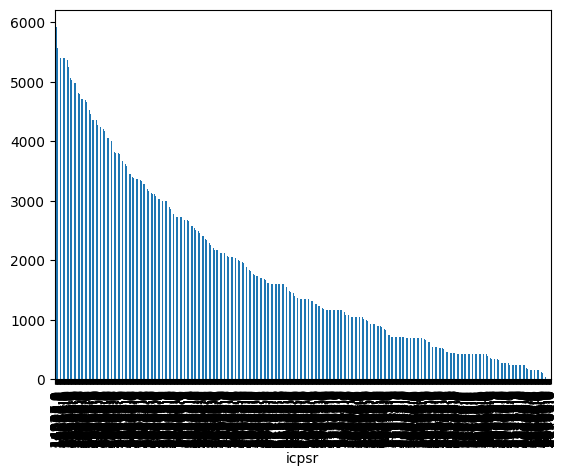

In [11]:
df.reset_index()["icpsr"].value_counts().plot.bar()

In [12]:
df

vote_passed  \
date       congress session chamber bill_number rollnumber icpsr                  
1990-01-24 101      2.0     0       hr2712      371        633.0              1   
                                                           1077.0             1   
                                                           1087.0             1   
                                                           2009.0             1   
                                                           2605.0             1   
...                                                                         ...   
2018-01-29 115      2.0     1       s2311       350        49308.0            0   
                                                           49703.0            0   
                                                           49706.0            0   
                                                           94659.0            0   
                                                           99912.0            0   

                                                                    vote_type_amend  \
date       congress session chamber bill_number rollnumber icpsr                      
1990-01-24 101      2.0     0       hr2712      371        633.0                  0   
                                                           1077.0                 0   
                                                           1087.0                 0   
                                                           2009.0                 0   
                                                           2605.0                 0   
...                                                                             ...   
2018-01-29 115      2.0     1       s2311       350        49308.0                0   
                                                           49703.0                0   
                                                           49706.0                0   
                                                           94659.0                0   
                                                           99912.0                0   

                                                                    vote_type_cloture  \
date       congress session chamber bill_number rollnumber icpsr                        
1990-01-24 101      2.0     0       hr2712      371        633.0                    0   
                                                           1077.0                   0   
                                                           1087.0                   0   
                                                           2009.0                   0   
                                                           2605.0                   0   
...                                                                               ...   
2018-01-29 115      2.0     1       s2311       350        49308.0                  1   
                                                           49703.0                  1   
                                                           49706.0                  1   
                                                           94659.0                  1   
                                                           99912.0                  1   

                                                                    vote_type_concur  \
date       congress session chamber bill_number rollnumber icpsr                       
1990-01-24 101      2.0     0       hr2712      371        633.0                   0   
                                                           1077.0                  0   
                                                           1087.0                  0   
                                                           2009.0                  0   
                                                           2605.0                  0   
...                                                                              .

In [18]:
info_df = pd.read_csv("../data/house_senate_members.csv")
print(info_df.shape)
info_df.head()

(51044, 22)


,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0.0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2.0,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.758,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1.0,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.776,98.0,9.0,NaN,-0.559,-0.052
3,1,House,6071,44,3.0,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.880,99.0,2.0,NaN,-0.413,-0.232
4,1,House,1538,52,6.0,MD,5000,0.0,1.0,"CARROLL, Daniel",...,1796.0,0.116,-0.740,-23.47008,0.783,96.0,11.0,NaN,0.114,-0.779


In [19]:
info_df.columns

Index(['congress', 'chamber', 'icpsr', 'state_icpsr', 'district_code',
       'state_abbrev', 'party_code', 'occupancy', 'last_means', 'bioname',
       'bioguide_id', 'born', 'died', 'nominate_dim1', 'nominate_dim2',
       'nominate_log_likelihood', 'nominate_geo_mean_probability',
       'nominate_number_of_votes', 'nominate_number_of_errors', 'conditional',
       'nokken_poole_dim1', 'nokken_poole_dim2'],
      dtype='object')

In [20]:
info_df["party_code"].unique()

array([5000, 4000,    1,   13, 1346, 8888, 6000, 7777, 8000, 7000,   22,
        555, 1275,   26,   44,   29,  100,  328,  112,  329,  603,  403,
        310, 1111,  300, 4444,   46, 3333,  200, 3334,  108,  206,   37,
        203,  331, 1116,  208,  326,  117,  114,  355,  356,  340, 1060,
        354,  213,  380,  370,  347,  537,  523,  522,  402])